In [17]:
import pandas as pd
import akshare as ak
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
sns.set(font='SimHei')
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 
df = ak.stock_zh_a_spot_em()
df.to_excel('example2.xlsx', sheet_name='Sheet1', index=False)

In [18]:
import pandas as pd
import akshare as ak
df=ak.stock_zh_a_hist(symbol='688256', period='daily', start_date='20230601', end_date='20240601', adjust='qfq')
df.to_csv('688256a.csv',index=False)

In [19]:
df

,日期,股票代码,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,2023-06-01,688256,248.00,237.01,259.24,237.00,121860,3.007753e+09,8.75,-6.76,-17.18,5.00
1,2023-06-02,688256,241.00,228.70,244.58,224.84,118296,2.732752e+09,8.33,-3.51,-8.31,4.86
2,2023-06-05,688256,227.70,230.32,235.24,225.00,89765,2.066278e+09,4.48,0.71,1.62,3.68
3,2023-06-06,688256,227.00,223.25,232.18,219.00,91596,2.059426e+09,5.72,-3.07,-7.07,3.75
4,2023-06-07,688256,221.09,221.20,226.53,217.12,71106,1.572973e+09,4.22,-0.92,-2.05,2.91
...,...,...,...,...,...,...,...,...,...,...,...,...
237,2024-05-27,688256,170.00,175.99,177.60,165.98,98148,1.687678e+09,6.76,2.38,4.09,2.36
238,2024-05-28,688256,174.51,172.25,183.00,172.00,80918,1.428303e+09,6.25,-2.13,-3.74,1.94
239,2024-05-29,688256,174.30,172.00,178.64,170.11,57707,1.005904e+09,4.95,-0.15,-0.25,1.39
240,2024-05-30,688256,170.33,172.53,175.00,168.64,52393,9.036888e+08,3.70,0.31,0.53,1.26


Test Statistic: -2.823048
p-value: 0.055056
No. of lags used: 0.000000
Number of observations used: 241.000000
critical value 1%: -3.457779
critical value 5%: -2.873609
critical value 10%: -2.573202


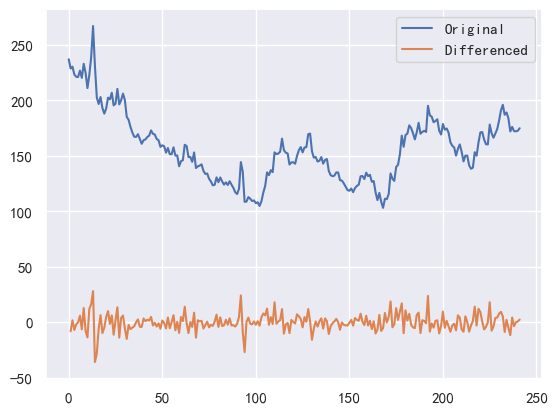

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
lit=['收盘']
data=df[lit]
result = adfuller(data)
print("Test Statistic: %f" % result[0])
print("p-value: %f" % result[1])
print("No. of lags used: %f" % result[2])
print("Number of observations used: %f" % result[3])
print("critical value 1%%: %f" % result[4]["1%"])
print("critical value 5%%: %f" % result[4]["5%"])
print("critical value 10%%: %f" % result[4]["10%"])
if result[1] > 0.05:
    diff_data = data.diff().dropna()
    plt.figure()
    plt.plot(data, label='Original')
    plt.plot(diff_data, label='Differenced')
    plt.legend()
    data = diff_data
else:
    plt.figure()
    plt.plot(data, label='Original')
    plt.legend()

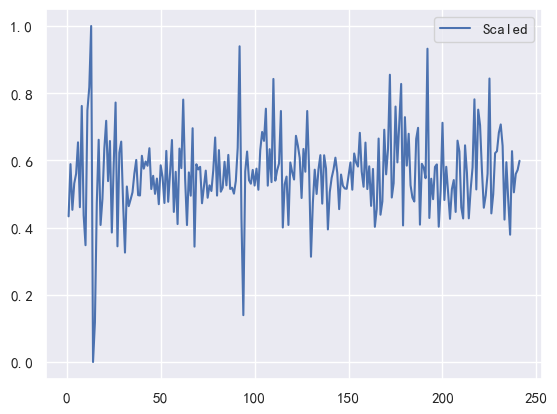

In [21]:
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)
plt.figure()
plt.plot(scaled_data, label='Scaled')
plt.legend()

min aci: (2, 1, 1)


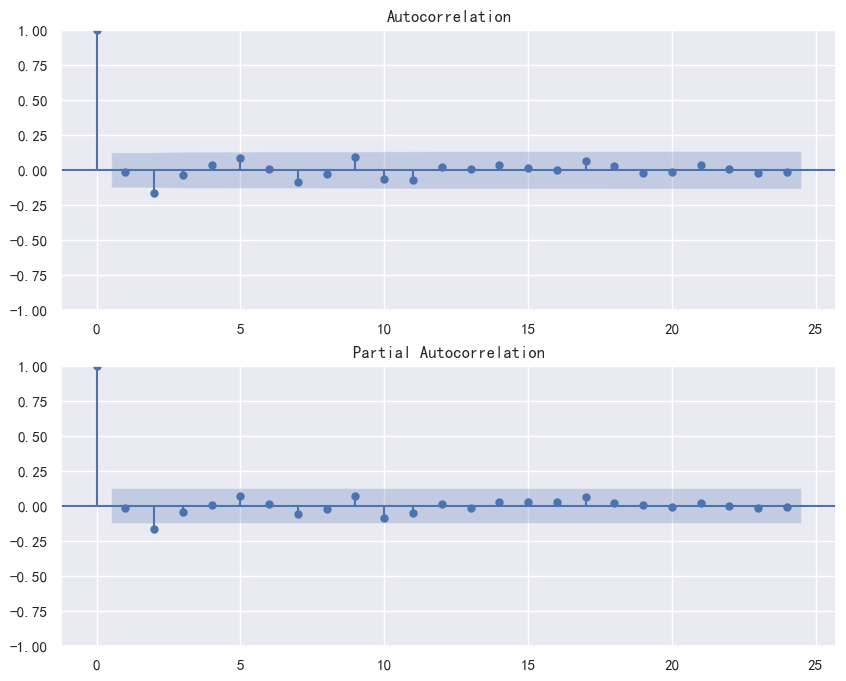

In [22]:
aic_values = {}
for p in range(6):
    for q in range(6):
        try:
            model = ARIMA(scaled_data, order=(p, 1, q))
            result = model.fit()
            aic_values[(p, 1, q)] = result.aic
        except:
            continue
min_aic = min(aic_values, key=aic_values.get)
print("min aci:", min_aic)
model = ARIMA(scaled_data, order=min_aic)
result = model.fit()
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(scaled_data, ax=axes[0])
plot_pacf(scaled_data, ax=axes[1])
plt.show()

In [23]:
stock_file = '688256a.csv'
df = pd.read_csv(stock_file, index_col='日期', parse_dates=True)
df

,股票代码,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
日期,,,,,,,,,,,
2023-06-01,688256,248.00,237.01,259.24,237.00,121860,3.007753e+09,8.75,-6.76,-17.18,5.00
2023-06-02,688256,241.00,228.70,244.58,224.84,118296,2.732752e+09,8.33,-3.51,-8.31,4.86
2023-06-05,688256,227.70,230.32,235.24,225.00,89765,2.066278e+09,4.48,0.71,1.62,3.68
2023-06-06,688256,227.00,223.25,232.18,219.00,91596,2.059426e+09,5.72,-3.07,-7.07,3.75
2023-06-07,688256,221.09,221.20,226.53,217.12,71106,1.572973e+09,4.22,-0.92,-2.05,2.91
...,...,...,...,...,...,...,...,...,...,...,...
2024-05-27,688256,170.00,175.99,177.60,165.98,98148,1.687678e+09,6.76,2.38,4.09,2.36
2024-05-28,688256,174.51,172.25,183.00,172.00,80918,1.428303e+09,6.25,-2.13,-3.74,1.94
2024-05-29,688256,174.30,172.00,178.64,170.11,57707,1.005904e+09,4.95,-0.15,-0.25,1.39


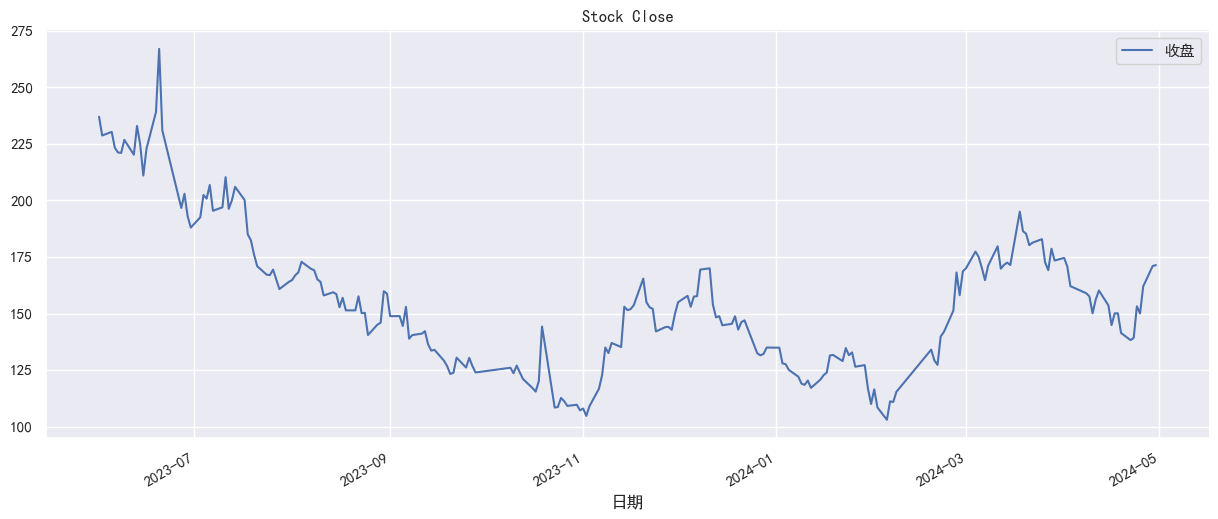

In [24]:
stock_week = df['收盘']#.resample('W-MON').mean()
stock_train = stock_week['2023-06-01':'2024-05-01']
stock_actual=stock_week['2024-05-01':'2024-06-01']
stock_train.plot(figsize=(15,6))
plt.legend()
plt.title('Stock Close')
sns.despine()

In [25]:
stock_train

日期
2023-06-01    237.01
2023-06-02    228.70
2023-06-05    230.32
2023-06-06    223.25
2023-06-07    221.20
               ...  
2024-04-24    153.19
2024-04-25    150.00
2024-04-26    161.99
2024-04-29    171.01
2024-04-30    171.39
Name: 收盘, Length: 222, dtype: float64

In [26]:
stock_actual=stock_week['2024-05-01':'2024-06-01']

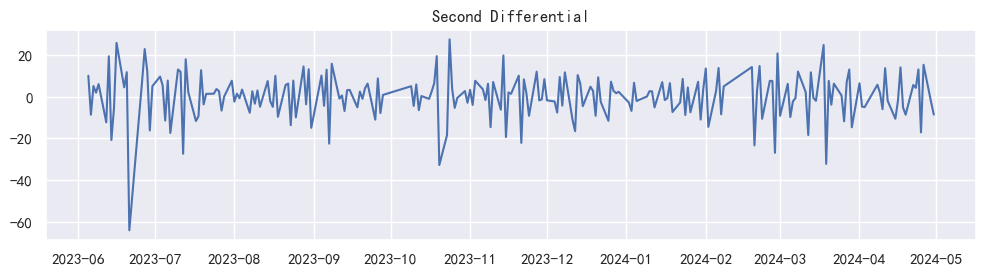

In [27]:
# 将时间序列进行差分并确定参数d
# 一阶差分
stock_diff_1 = stock_train.diff()
stock_diff_1.dropna(inplace=True)
# 二阶差分
stock_diff_2 = stock_diff_1.diff()
stock_diff_2.dropna(inplace=True)
plt.figure(figsize=(12,6))

plt.subplot(2,1,2)
plt.plot(stock_diff_2)
plt.title('Second Differential')
plt.show()

In [28]:
model = sm.tsa.ARIMA(stock_train, order=(2, 1, 4))
result = model.fit()

### 拟合ARIMA模型
model = sm.tsa.ARIMA(stock_train, order=(2, 1, 4))
result = model.fit()

In [29]:
stock_future = stock_week['2024-05-01':]

In [30]:
# 使用该模型进行预测
forecast = result.forecast(len(stock_future))
forecast.index=stock_future.index

In [31]:
forecast

日期
2024-05-06    171.200302
2024-05-07    169.073242
2024-05-08    167.610266
2024-05-09    169.426000
2024-05-10    171.023406
2024-05-13    169.394439
2024-05-14    167.682721
2024-05-15    169.118547
2024-05-16    170.924319
2024-05-17    169.686005
2024-05-20    167.806393
2024-05-21    168.844774
2024-05-22    170.778238
2024-05-23    169.940321
2024-05-24    167.972601
2024-05-27    168.611335
2024-05-28    170.594264
2024-05-29    170.151713
2024-05-30    168.171924
2024-05-31    168.422913
Name: predicted_mean, dtype: float64

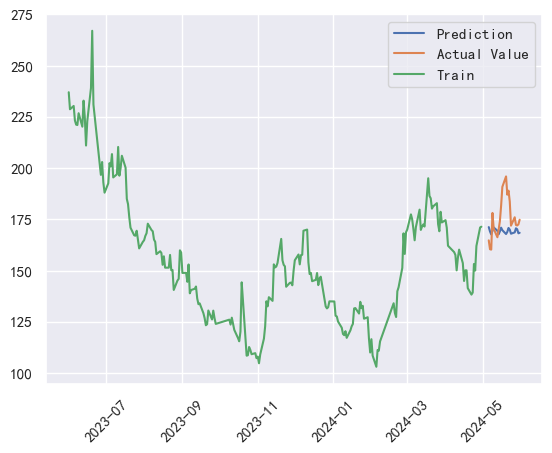

In [32]:
plt.xticks(rotation=45)
plt.plot(forecast,label='Prediction')
plt.plot(stock_actual,label='Actual Value')
plt.plot(stock_train,label='Train')
plt.legend()
plt.show()

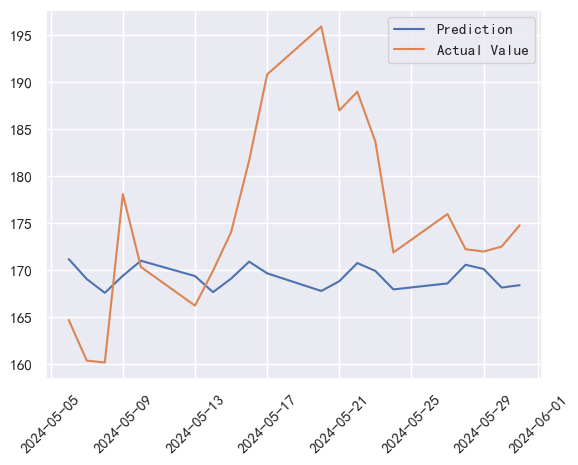

In [33]:
plt.xticks(rotation=45)
plt.plot(forecast,label='Prediction')
plt.plot(stock_actual,label='Actual Value')
plt.legend()
plt.show()